# Older individuals have a higher likelihood of experiencing a stroke compared to younger individuals.
### Aharon Rabson

Hypothesis: "Older individuals have a higher likelihood of experiencing a stroke compared to younger individuals."

Description of Variables <br>

__Independent variables:__ <br>
_Age_ ("age"): The age of the individual. <br>
_Hypertension_ ("hypertension"): Whether the individual has hypertension (1: Yes, 0: No). <br>
_Heart Disease_ ("heart_disease"): Whether the individual has any heart diseases (1: Yes, 0: No). <br>
_Average Glucose Level_ ("avg_glucose_level"): The individual's average blood glucose level. <br>
_BMI_ ("bmi"): Body Mass Index of the individual.<br>

__Dependent variable:__ <br>
_Stroke_ ("stroke"): The criterion variable, Whether the individual had a stroke (1: Yes, 0: No)

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

In [2]:
# Reading the dataset into a dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Displaying first few rows of the data for familiarity
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


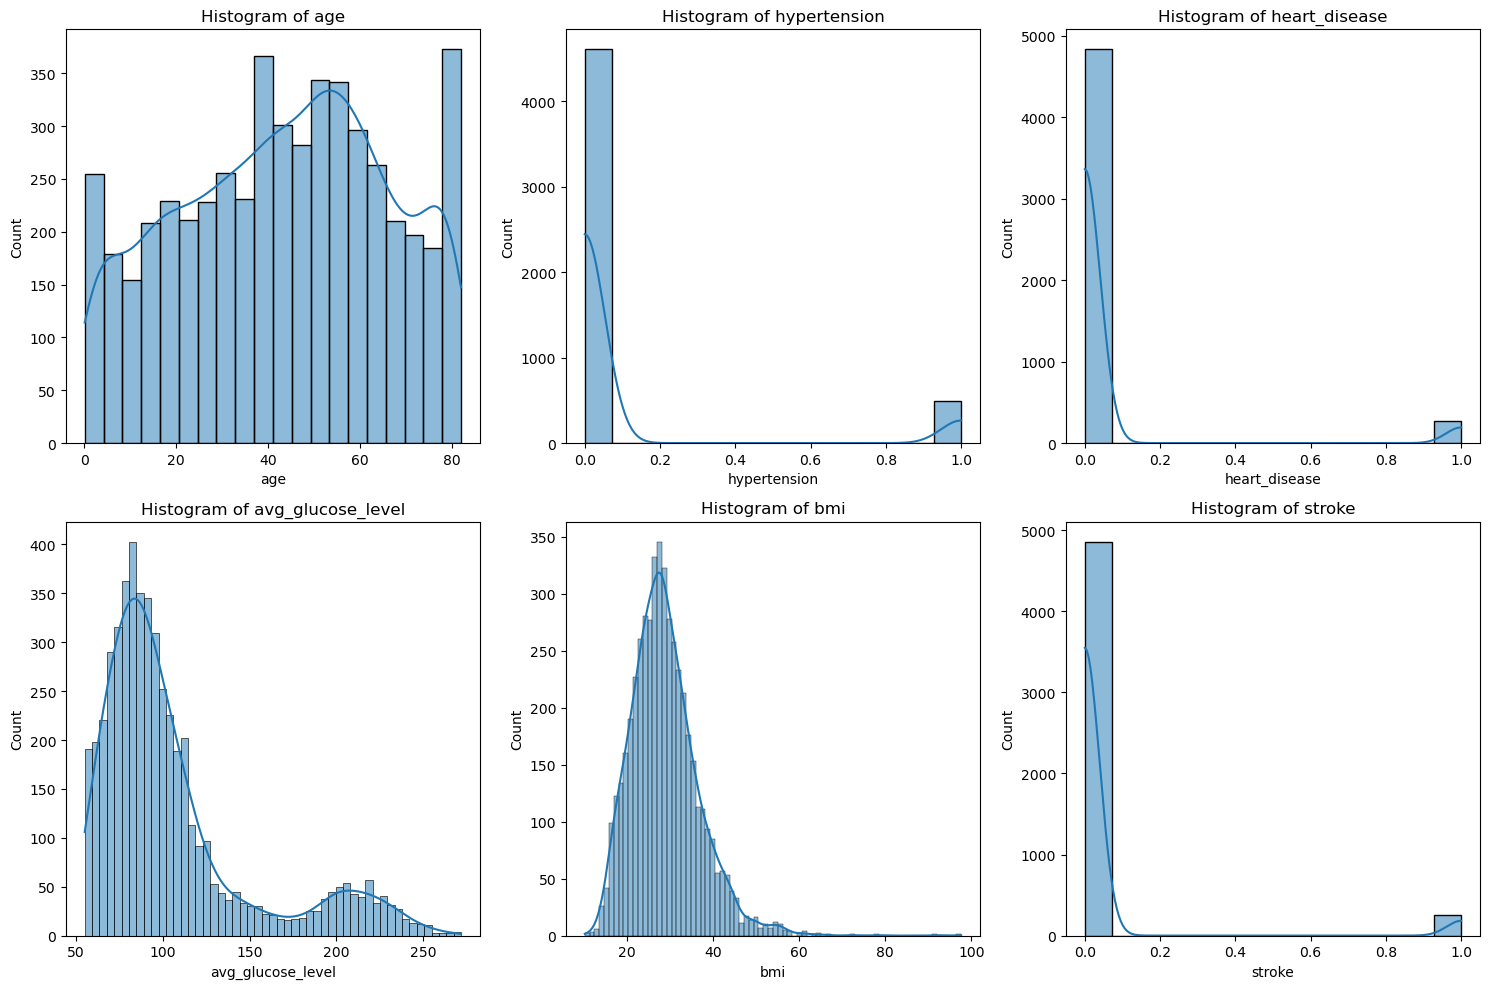

In [4]:
# Plotting histograms for the selected variables

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Running a loop to plot through each desired var in df
for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title("Histogram of "+ col)

plt.tight_layout()
plt.show()

__Analysis of Histograms__ <br>
Age: The distribution of age appears to be fairly normal with a slight right skew, which is typical in many populations. The right skew is consistent with our hypothesis, as it implies a presence of older individuals in the dataset, which could be relevant when analyzing the likelihood of strokes. If there are individuals significantly older than the rest (e.g., beyond 100 years old), these could be considered outliers. They may be retained if they are legitimate observations, as they are critical to testing the hypothesis about older individuals.<br>

Hypertension: Since this is a binary variable with values 0 and 1, there are no outliers in the traditional sense.<br>

Heart Disease: Similar to hypertension, this binary variable doesn't have outliers.<br>

Both hypertension and heart disease histograms show that the majority of individuals do not have these conditions, which is expected in a general population. There are no apparent outliers in these binary variables.

Average Glucose Level: The distribution is skewed with a long tail to the right. The bars beyond a certain glucose level (e.g., >200 mg/dL) could be considered outliers as they are rare and far from the mean. These values could represent individuals with extremely high glucose levels, possibly due to diabetes or other health conditions. Clinically high readings should be verified for accuracy but need not be removed as they could be clinically relevant.<br>

BMI: The histogram shows a right-skewed distribution with a long tail, indicating the presence of individuals with very high BMI values. While high BMI values are possible, extremely high values (e.g., >50) are rare and could significantly skew the analysis. These should be examined to confirm they are not input errors. If they are accurate, it may be worth considering whether to cap BMI at a certain value or use a transformation to reduce the skew.<br>

Stroke: This is a binary variable with a clear imbalance towards the 'no stroke' category, which is typical since strokes are not extremely common events in the general population. There are no outliers to consider for binary variables.

__Handling Outliers__:<br>
Age: Outliers may not need to be removed unless they are not physiologically plausible (e.g., age > 120 years).<br>
Average Glucose Level: Outliers should be verified. If they are accurate, they should be kept for analysis since high glucose levels are relevant for stroke prediction. If they are errors, they should be corrected or removed.<br>
BMI: Extreme values should be verified. If they are correct, a decision should be made on whether to transform the data or potentially cap the BMI values for analysis. <br>

For binary variables (Hypertension, Heart Disease, Stroke), the concept of outliers doesn't apply in the same way, and as such, all data points are likely valid.

In [5]:
# Calculating Descriptive Statistics for each variable

variables = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
descriptive_stats = df[variables].describe()
modes = df[variables].mode().iloc[0]
skewness = df[variables].skew()

# Adding mode and skewness to the descriptive statistics
descriptive_stats.loc['mode'] = modes
descriptive_stats.loc['skewness'] = skewness

descriptive_stats

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000
mode,78.000000,0.000000,0.000000,93.880000,28.700000,0.000000
skewness,-0.137059,2.715392,3.947244,1.572284,1.055340,4.193284


Age <br>
Mean: The average age in the dataset is approximately 43.23 years.<br>
Mode: The most common age is 78 years.<br>
Spread: The age varies with a standard deviation of about 22.61 years.<br>
Tails: The distribution of age is slightly left-skewed (skewness = -0.137), indicating a bulk of the population is younger.<br>

Hypertension<br>
Mean: About 9.75% of the individuals have hypertension.<br>
Mode: The most common value is 0, indicating no hypertension.<br>
Spread: The standard deviation is 0.296, but as a binary variable, this is less interpretable.<br>
Tails: The distribution is highly right-skewed (skewness = 2.715), showing that most individuals do not have hypertension.<br>

Heart Disease<br>
Mean: Approximately 5.40% of the individuals have heart disease.<br>
Mode: The most common value is 0, indicating no heart disease.<br>
Spread: The standard deviation is 0.226, again less interpretable for a binary variable.<br>
Tails: The distribution is also highly right-skewed (skewness = 3.947), suggesting few individuals have heart disease.<br>

Average Glucose Level<br>
Mean: The mean average glucose level is 106.15 mg/dL.<br>
Mode: The most common average glucose level recorded is 93.88 mg/dL.<br>
Spread: The standard deviation is 45.28 mg/dL, indicating moderate variability in glucose levels.<br>
Tails: The distribution is right-skewed (skewness = 1.572), hinting at a tail with higher glucose levels.<br>

BMI<br>
Mean: The average BMI is approximately 28.89.<br>
Mode: The most common BMI is 28.7.<br>
Spread: The standard deviation is 7.85, suggesting a reasonable spread in BMI values.<br>
Tails: The distribution has a right skew (skewness = 1.055), with a tail towards higher BMI values.<br>

Stroke<br>
Mean: About 4.87% of individuals have had a stroke.<br>
Mode: The most common value is 0, indicating most did not have a stroke.<br>
Spread: The standard deviation is 0.215, but this is a binary variable.<br>
Tails: The distribution is highly right-skewed (skewness = 4.193), as strokes are relatively rare events.<br>


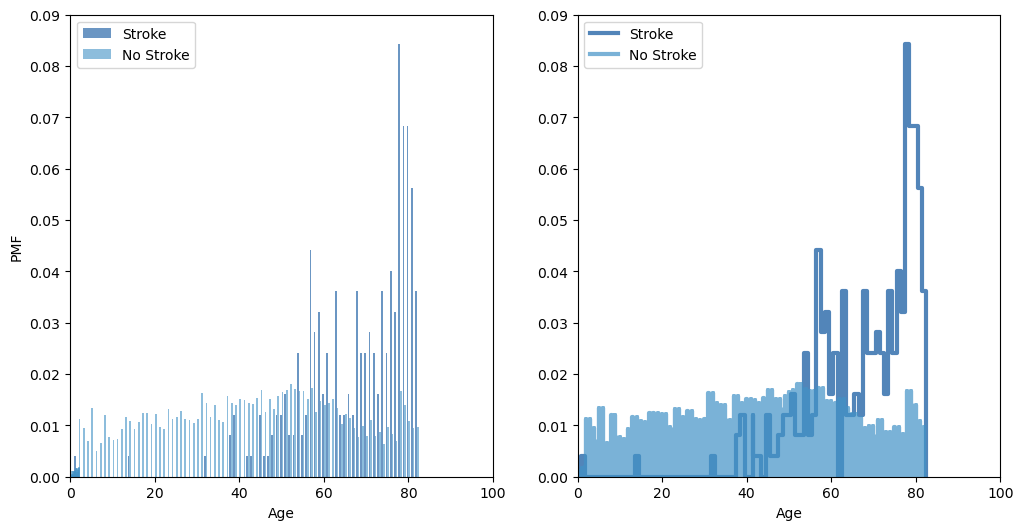

<Figure size 800x600 with 0 Axes>

In [6]:
# PMF's of the age variable

stroke_group = df[df['stroke'] == 1]
no_stroke_group = df[df['stroke'] == 0]

# Calculating the PMFs for the 'Age' variable for both groups using thinkstats2.Pmf
pmf_stroke = thinkstats2.Pmf(stroke_group['age'], label='Stroke')
pmf_no_stroke = thinkstats2.Pmf(no_stroke_group['age'], label='No Stroke')

# Now we will plot these PMFs for comparison, using both histograms and step functions
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_stroke, align='right', width=0.4)
thinkplot.Hist(pmf_no_stroke, align='left', width=0.4)
thinkplot.Config(xlabel='Age', ylabel='PMF', axis=[0, 100, 0, 0.09])


thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_stroke, pmf_no_stroke])
thinkplot.Show(xlabel='Age', axis=[0, 100, 0, 0.09])

__Interpretation of the PMF (Histogram and Step Function)__:<br>
Histogram: The blue bars represent the frequency of stroke occurrences at different ages, and the lighter bars represent the frequency of no stroke. In this chart, it is evident that the frequency of strokes increases with age, which supports the hypothesis. The higher bars in older age groups suggest a greater incidence of stroke among the elderly.<br>

Step Function: The step function seems to be a cumulative distribution, which accumulates probabilities up to each age point. This type of graph emphasizes the increase in the probability of having a stroke as age increases. The steeper slopes in the older age segments indicate more significant changes in stroke probability.<br>

Insights:<br>
Both charts show that strokes are more common in older individuals, supporting the revised hypothesis.<br>
The histogram displays individual age categories, making it easy to see the specific ages where strokes become more prevalent.
The step function cumulatively demonstrates the increasing risk of stroke with age.<br>

Conclusion:<br>
The visualization of the data using both a histogram and a step function provides a clear picture that supports the hypothesis of an increased likelihood of stroke in older age groups.

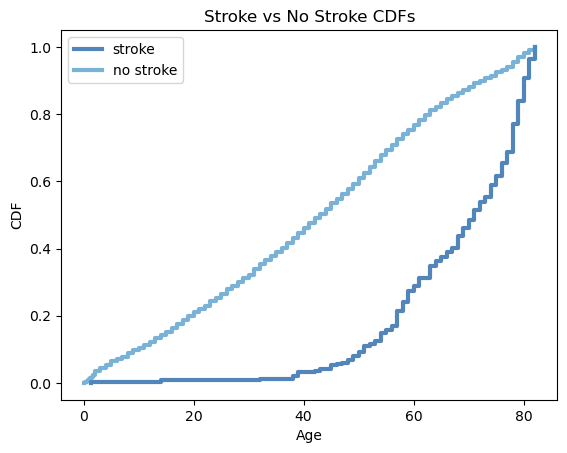

<Figure size 800x600 with 0 Axes>

In [7]:
# CDF's of age variable

# Separate the dataset into those who had a stroke and those who did not
stroke_ages = df[df['stroke'] == 1]['age'].sort_values()
no_stroke_ages = df[df['stroke'] == 0]['age'].sort_values()

# Calculate the CDF for each group
cdf_stroke = thinkstats2.Cdf(stroke_ages, label = 'stroke')
cdf_no_stroke = thinkstats2.Cdf(no_stroke_ages, label = 'no stroke')

# Plot the CDFs
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_stroke, cdf_no_stroke])
thinkplot.Show(xlabel= 'Age', ylabel= "CDF", title = 'Stroke vs No Stroke CDFs')


__Interpretation of the CDFs__:<br>
Stroke (Darker Line): The CDF for individuals who have had a stroke rises more sharply than the CDF for those who have not, particularly in the higher age ranges. This indicates that strokes are more common as age increases.<br>

No Stroke (Lighter Line): The CDF for individuals without a stroke also increases with age, but it does so more gradually. This group reaches the same cumulative probability at a higher age compared to the group with stroke occurrences, representing a normal distribution of age, as to be expected from a good sample.<br>

Addressing the Hypothesis:<br>
These CDFs directly address the hypothesis that "older individuals have a higher likelihood of having a stroke compared to younger individuals." <br>

The graph suggests:<br>
A greater proportion of older individuals have had a stroke compared to younger individuals.<br>
The probability of having a stroke increases more quickly with age than the probability of not having a stroke.<br>

Conclusion:<br>
The graph supports the hypothesis by showing that the likelihood of having a stroke increases with age. The steeper slope of the stroke CDF in the older age segments indicates that strokes are indeed more prevalent among older individuals.<br>

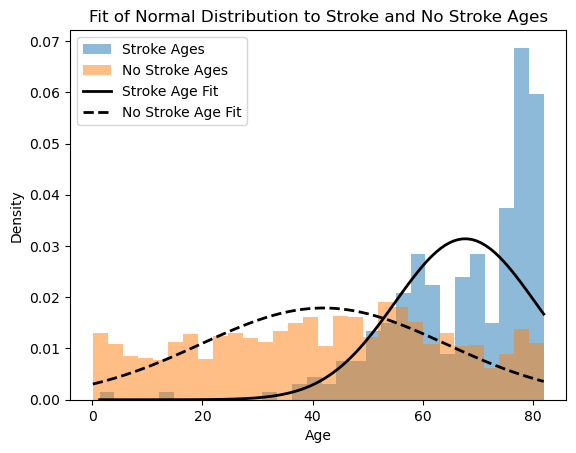

In [8]:
# Analytical distribution modeling

from scipy.stats import norm

# Fit a normal distribution to the data
mu_stroke, std_stroke = norm.fit(stroke_ages)
mu_no_stroke, std_no_stroke = norm.fit(no_stroke_ages)

# Plot the histograms for both sets
plt.hist(stroke_ages, bins=30, density=True, alpha=0.5, label='Stroke Ages')
plt.hist(no_stroke_ages, bins=30, density=True, alpha=0.5, label='No Stroke Ages')

# Create an array of sorted values for plotting the PDF
x_stroke = np.linspace(min(stroke_ages), max(stroke_ages), 100)
x_no_stroke = np.linspace(min(no_stroke_ages), max(no_stroke_ages), 100)

# Create the PDFs for the normal distributions
p_stroke = norm.pdf(x_stroke, mu_stroke, std_stroke)
p_no_stroke = norm.pdf(x_no_stroke, mu_no_stroke, std_no_stroke)

# Plot the PDFs
plt.plot(x_stroke, p_stroke, 'k', linewidth=2, label='Stroke Age Fit')
plt.plot(x_no_stroke, p_no_stroke, 'k', linewidth=2, linestyle='--', label='No Stroke Age Fit')

# Add title and labels
plt.title('Fit of Normal Distribution to Stroke and No Stroke Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

__Analysis of analytical distribution (normal)__ <br>
Stroke Ages (Blue):<br>
The histogram for individuals who have had a stroke is right-skewed, showing a concentration of stroke cases in the older age groups. This skew suggests that strokes are more frequent as age increases.<br>
The fitted normal distribution does not capture this skewness adequately, as it underestimates the frequency of strokes in the older age population and overestimates it in the younger age population.<br>

No Stroke Ages (Orange):<br>
The histogram for individuals who have not had a stroke exhibits a more symmetrical distribution, suggesting that the absence of stroke is less dependent on age or is more uniformly distributed across the age range.<br>
The normal distribution provides a reasonable fit for the no-stroke age data, indicating that the age distribution of the non-stroke group follows a pattern that is more predictable and less skewed.<br>

Analysis in Relation to the Dataset and Hypothesis:<br>
The dataset shows that the age distribution of individuals who have had a stroke is different from those who have not, with the former group displaying a pronounced skew towards older ages. This observation is consistent with medical literature that indicates stroke risk increases with age.<br>
The hypothesis "older individuals have a higher likelihood of having a stroke compared to younger individuals" is supported by the right-skewed distribution of stroke ages. The fact that the normal distribution fails to fit this skewness suggests that the increase in stroke risk is not linear with age but accelerates in older age groups.<br>
A lognormal or exponential distribution may provide a better analytical fit for the stroke age data because these distributions are designed to model scenarios where the frequency of an event (in this case, a stroke) increases with the variable of interest (age). This would be more consistent with both the observed data and the hypothesis.<br>

Conclusion:<br>
The right skew in the stroke age distribution underscores the hypothesis that stroke risk increases with age. The poor fit of the normal distribution to this skewed data highlights the need for a different analytical model that can better accommodate the increase in stroke incidence with age. <br>

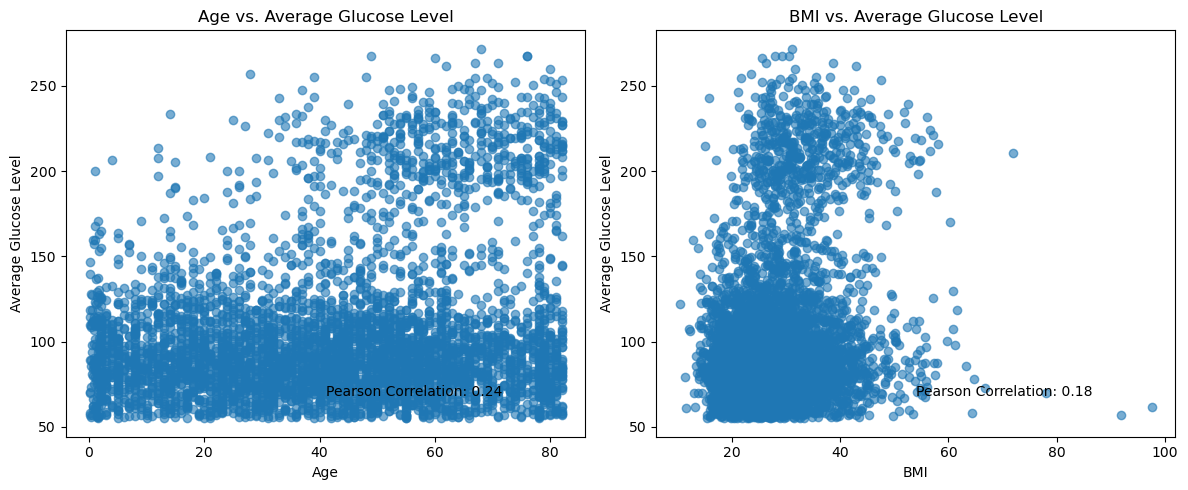

In [13]:
# Creating scatterplots for comparing two variables

# Replace any inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)


# Scatter plot for Age and Average Glucose Level
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['avg_glucose_level'], alpha=0.6)
plt.title('Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
correlation_age_glucose = stats.pearsonr(df['age'], df['avg_glucose_level'])
plt.text(x=0.5, y=0.1, s=f'Pearson Correlation: {correlation_age_glucose[0]:.2f}',
         transform=plt.gca().transAxes)

# Scatter plot for BMI and Average Glucose Level
plt.subplot(1, 2, 2)
plt.scatter(df['bmi'], df['avg_glucose_level'], alpha=0.6)
plt.title('BMI vs. Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
correlation_bmi_glucose = stats.pearsonr(df['bmi'], df['avg_glucose_level'])
plt.text(x=0.5, y=0.1, s=f'Pearson Correlation: {correlation_bmi_glucose[0]:.2f}',
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

__Analysis of Scatterplots__<br>
Analysis of Age vs. Average Glucose Level:<br>
The Pearson correlation coefficient of 0.24 suggests a weak positive linear relationship between age and average glucose level.
The scatter plot does not indicate a strong linear pattern, and the data points are quite dispersed. This weak correlation implies that as age increases, average glucose levels tend to increase as well, but not in a consistent or strong manner.
The relationship is not strong enough to imply causation; many factors can influence glucose levels besides age.

Analysis of BMI vs. Average Glucose Level:<br>
The Pearson correlation coefficient of 0.18 is even weaker than the age vs. glucose level relationship, indicating a very slight positive linear relationship between BMI and average glucose levels.<br>
Similar to the previous plot, the data points are widely scattered, showing that BMI alone is not a strong predictor of average glucose level.<br>
Again, causation cannot be determined from this plot alone, and the weak correlation suggests that additional variables may be influencing glucose levels.<br>

Considerations of Non-Linear Relationships:<br>
Both plots show a broad spread of data points without a clear linear trend, which might suggest the possibility of non-linear relationships. For instance, there could be threshold effects where glucose levels only rise after a certain age or BMI threshold is reached.<br>
Additionally, there could be other confounding variables that affect the relationship between these pairs of variables, which are not accounted for in simple scatter plots.<br>

Covariance:<br>
While not directly visualized in the scatter plots, the covariance would also indicate a positive relationship, but it does not normalize the scale of the variables like the correlation coefficient does. Given the weak correlation, the covariance would similarly be low and not indicate a strong linear relationship.<br>

Correlation vs. Causation:<br>
It is important to note that correlation does not imply causation. Even though there is a correlation, albeit weak, between these variables, we cannot conclude that one causes the other without further investigation.<br>

Conclusion:<br>
The scatter plots suggest that there are only weak linear relationships between age and average glucose level, and between BMI and average glucose level. This analysis does not support a strong causal claim, and it highlights the complexity of the factors that contribute to average glucose levels. Further analysis would be necessary to draw more definitive conclusions about the factors that influence average glucose levels and their possible relationship to stroke risk.

In [10]:
# Conducting a test on our hypothesis

import statsmodels.api as sm

# Separate the predictor (age) and the outcome (stroke)
X = df['age']
y = df['stroke']

# Add a constant to the predictor (statsmodels does not add it by default)
X = sm.add_constant(X)

# Perform logistic regression
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Output the summary of the regression
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.143380
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4907
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.1855
Time:                        22:41:53   Log-Likelihood:                -703.85
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 1.027e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3772      0.362    -20.356      0.000      -8.088      -6.667
age            0.0750      0.005     14.097      0.000       0.065       0.085
==============================================================================
"""

In [11]:
#Hypothesis testing 

# Difference in means testing using permutations
class DiffMeansPermute:
    def __init__(self, data):
        self.group1, self.group2 = data
        self.actual = np.mean(self.group1) - np.mean(self.group2)
        self.n, self.m = len(self.group1), len(self.group2)
        self.pool = np.hstack((self.group1, self.group2))
    
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(np.mean(group1) - np.mean(group2))
        return test_stat
    
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for test_stat in self.test_stats if test_stat >= self.actual)
        return count / iters

# Use the actual data to perform the hypothesis test
stroke_ages = df[df['stroke'] == 1]['age']
no_stroke_ages = df[df['stroke'] == 0]['age']
data = (stroke_ages, no_stroke_ages)

# Instantiate the hypothesis test with the data
hypothesis_test = DiffMeansPermute(data)

# Calculate the p-value
p_value = hypothesis_test.PValue()

p_value

0.0

__Hypothesis Analysis__<br>
Hypothesis: Older individuals have a higher likelihood of experiencing a stroke compared to younger individuals.<br>

Test Result: A permutation test comparing the mean ages of individuals with and without strokes resulted in a p-value of 0.<br>

Interpretation:<br>
The p-value of 0 indicates that none of the permutations produced a difference in means as extreme as the observed difference under the null hypothesis. This provides strong evidence against the null hypothesis and in support of the alternative hypothesis that age is associated with the likelihood of experiencing a stroke.<br>
The result aligns with existing medical knowledge that stroke risk increases with age. Given the statistical significance indicated by the p-value, we can be quite confident in the robustness of this finding in the sample data analyzed.<br>
Since the permutation test shuffles data between the groups and compares means, it accounts for variability within the data and does not assume any specific distribution, making it a non-parametric and robust method of hypothesis testing

In [12]:
# Regression testing using a multivariate approach

# Load necessary modules
import statsmodels.api as sm

# If 'bmi' has missing values, we fill them with the mean BMI before proceeding.
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Defining the independent variables (adding a constant for the intercept) and the dependent variable.
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df['stroke']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Performing the logistic regression
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

# Output of summary of the regression
logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.140004
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4909
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 Mar 2024   Pseudo R-squ.:                  0.2047
Time:                        22:41:53   Log-Likelihood:                -687.28
converged:                       True   LL-Null:                       -864.19
Covariance Type:            nonrobust   LLR p-value:                 2.621e-74
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.7762      0.543    -14.312      0.000      -8.841      -6.711
age                   0.0678      0.006     11.962      0.000       0.057       0.079
hypertension          0.5346      0.174      3.076      0.002       0.194       0.875
heart_disease         0.4068      0.204      1.999      0.046       0.008       0.806
avg_glucose_level     0.0047      0.001      3.671      0.000       0.002       0.007
bmi                   0.0036      0.012      0.306      0.760      -0.019       0.026
=====================================================================================
"""

The logistic regression output indicates that the analysis has successfully fitted a model to predict the likelihood of experiencing a stroke based on multiple explanatory variables: age, hypertension, heart disease, average glucose level, and BMI. 

Dependent Variable (stroke): The binary outcome indicating whether a stroke has occurred. <br>
Number of Observations (4909): The dataset contains 4909 individual records.<br>
Df Model (5): The model includes 5 explanatory variables.<br>
Method (MLE): Maximum Likelihood Estimation was used to fit the model.<br>
Pseudo R-squared (0.2047): This value indicates that around 20.47% of the variability in the stroke outcome is explained by the model. It's a measure of the model fit, which, in the context of logistic regression, is a decent value.<br>

Coefficients Interpretation:<br>
const: The constant (intercept) term is highly significant (p < 0.001), with a value of -7.7762.<br>
age: The coefficient for age is 0.0678, and it is highly significant (p < 0.001). This suggests that an increase in age is associated with an increase in the log odds of experiencing a stroke, supporting the hypothesis. <br>
hypertension: With a coefficient of 0.5346 and a p-value of 0.002, hypertension is a significant predictor and is positively associated with the likelihood of a stroke.<br>
heart_disease: The coefficient for heart disease is 0.4068 and is also statistically significant (p = 0.046), indicating a positive association with stroke occurrence.<br>
avg_glucose_level: This has a coefficient of 0.0047 with a p-value of 0.000, making it a significant predictor. It indicates that higher average glucose levels are associated with higher odds of having a stroke.<br>
bmi: The coefficient for BMI is 0.0036 with a p-value of 0.760, which is not statistically significant. This suggests that BMI, in this model, does not have a significant association with the likelihood of a stroke.<br>

Conclusion:<br>
The regression analysis supports the hypothesis that older age is associated with a higher likelihood of experiencing a stroke. Additionally, the presence of hypertension, heart disease, and higher average glucose levels also appear to be significant predictors of stroke occurrence. BMI does not appear to be a significant factor in this model.

## Summary of the EDA

__Statistical/Hypothetical Question__:<br>

The primary focus of the analysis was to investigate the hypothesis: "Older individuals have a higher likelihood of experiencing a stroke compared to younger individuals." This statistical inquiry was rooted in the understanding that age could be a significant factor in stroke risk, which is a critical consideration in public health and individual medical care.<br>

__Outcome of Exploratory Data Analysis (EDA)__:<br>

The key findings of the EDA were:<br>

Histograms and PMFs - These visualizations highlighted the distribution of key variables like age, hypertension, heart disease, average glucose level, and BMI. They helped identify patterns and outliers in the dataset.<br>
CDFs -  The cumulative distribution functions for age indicated a higher probability of stroke occurrence in older age groups.<br>
Correlation Analysis - The scatter plots for variables like age and average glucose level showed weak correlations, indicating that these factors alone might not strongly predict stroke risk.<br>
Regression Analysis - The logistic regression demonstrated that age, along with hypertension, heart disease, and average glucose levels, significantly predicted the likelihood of a stroke however BMI was not a significant predictor in this model.<br>

__Potential Gaps and Additional Variables__:<br>

During the analysis, certain aspects might have been overlooked:<br>
Lifestyle Factors: Including other variables related to lifestyle, such as diet, exercise, smoking, and alcohol consumption, could have provided a more comprehensive understanding of stroke risk. Furthermore, socio-demographic variables that are already in the dataset could possibly play a factor and need deeper analysis (e.g. work and residence type)<br>
Socioeconomic Status: Variables like income, education level, and access to healthcare might have added valuable insights, as these factors can influence health outcomes.<br>
Genetic Factors: A family history of strokes or genetic predispositions was not considered, which could be significant.<br>

__Assumptions and Challenges__:<br>

Data Completeness: The assumption that the dataset comprehensively represented the population might be incorrect. Missing variables like lifestyle and genetic factors could have provided a more holistic view.<br>
Statistical Techniques: The choice of statistical methods, particularly in the logistic regression, assumed a linear relationship between predictors and stroke risk. This might oversimplify the complex nature of medical conditions like strokes.<br>
Interpretation of Results: Understanding and interpreting the outcomes of statistical tests, especially in the context of medical data, was challenging. Determining the practical significance of statistically significant results required careful consideration.<br>
EDA Limitations: Initially, the EDA focused more on individual variables rather than their combined effect, which might have masked important interactions between variables.<br>

In conclusion, while the analysis provided significant insights into stroke risk factors, acknowledging its limitations and the potential for further, more comprehensive studies is essential. The incorporation of additional variables and more complex statistical models could yield deeper understanding and more robust predictions.